#  사례 : 타이타닉을 이용한 알고리즘 성능 비교 
<hr/>

In [1]:
# 기본 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

import matplotlib.font_manager as fm 
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font",family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

#------------------------------------------------------------------------------

from sklearn.model_selection import train_test_split

#pip install mglearn
import mglearn      # 머신러닝 학습을 위한 모듈

####
import sklearn.datasets as datasets
import sklearn.metrics

# 1. Collecting the data < 데이터 수집
- https://www.kaggle.com/c/titanic/data

In [2]:
train = pd.read_csv('data/titanic/train.csv')
test = pd.read_csv('data/titanic/test.csv')

# 2. Exploratory Data Analysis < 탐색적 데이터 분석

In [3]:
train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# 기본적인 통계 정보 
print(train.shape)
print(test.shape)
print(train.info())
print(test.info())

(891, 12)
(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null

In [5]:
'''
- Pclass
- Sex
- SibSp
- Parch
- Embarked
    C = Cherbourg, Q = Queenstown, S = Southampton
- Cabin
'''

def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (10, 5))

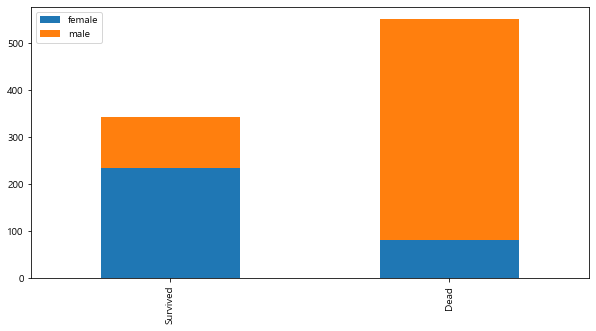

In [6]:
bar_chart('Sex') # 남자가 많이 죽었다 

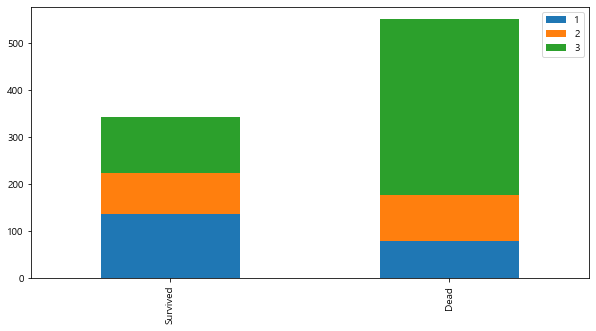

In [7]:
bar_chart('Pclass')  # 객실 등급도 충분히 생존여부에 영향을 미친다.

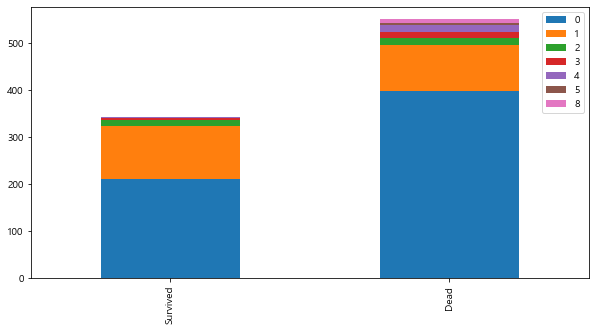

In [8]:
bar_chart('SibSp')  # 동승여부가 생존여부에 영향을 미친다.

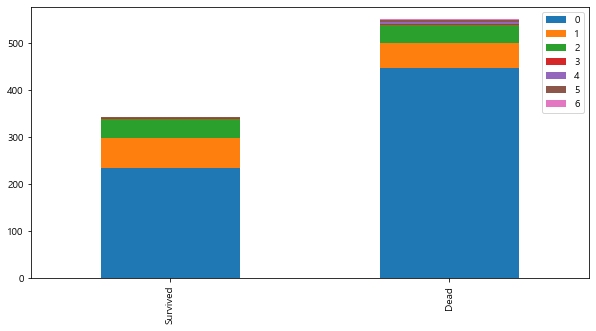

In [9]:
bar_chart('Parch')

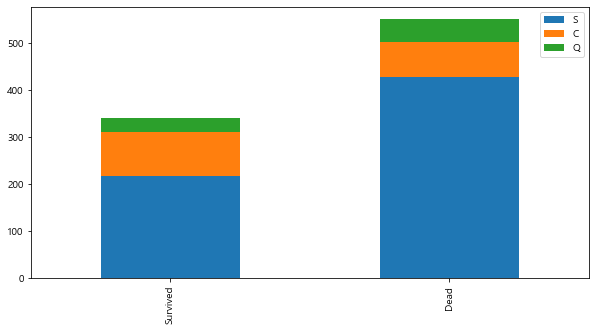

In [10]:
bar_chart('Embarked') # 연관은 있으나 개연성을 찾아야 한다 

# 3. Feature Engineering : 전처리 가공

<hr/>

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Name : Mr. Mrs, Miss를 추출

In [12]:
train_test_data = [train, test]

In [13]:
# 정규 표현식을 이용   <맨끝에 .이온다 
for dataset in train_test_data:
    dataset["Title"] = dataset['Name'].str.extract(' ([A-za-z]+)\.') 

In [14]:
print(train["Title"].value_counts())
print(test["Title"].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Sir           1
Ms            1
Jonkheer      1
Mme           1
Countess      1
Lady          1
Don           1
Capt          1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


In [15]:

title_mapping = {'Mr':0, 'Miss':1,'Mrs':2, 'Master':3, 'Dr':3, 'Rev' : 3,
                 'Col':3,'Major':3,'Mlle':3, 'Jonkheer':3,'Sir':3,'Mme':3,
                 'Capt':3,'Countess':3,'Lady':3, 'Ms':3, 'Don':3, 'Dona':3}

In [16]:
# mapping 적용 확인
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


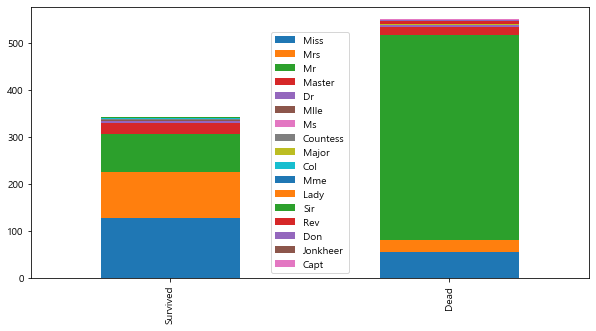

In [17]:
bar_chart("Title")

In [18]:
# 데이터 셋에서 불필요한 feature(Name) 삭제
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [19]:
# drop 적용 확인
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [20]:
for dataset in train_test_data:
    dataset['Sex']= dataset['Sex'].map({'male':0,'female':1})

In [21]:
# mapping 적용 확인
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,Mrs


## Age데이터의 binning

    child:0, young:1, adult: 2, mid-age:3, senior:4

In [22]:
# 결측치 확인 : 그냥 삭제하기엔 남은 데이터의 수가 부족함.
train.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [23]:
# 결측치 처리 : 남자들은 Mr의 평균나이, Mrs는 Mrs의 평균나이, Miss는 Miss의 평균나이
# 결측치를 각 Title에 대한 연령의 중간값 으로 채운다(Mr, Mrs, Miss, Others)
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),inplace=True)

In [24]:
train.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              1
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [25]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <16, 'Age'] = 0
    dataset.loc[(dataset['Age'] >=16) & (dataset['Age']<26),'Age'] = 1
    dataset.loc[(dataset['Age'] >=26) & (dataset['Age']<36),'Age'] = 2
    dataset.loc[(dataset['Age'] >=36) & (dataset['Age']<62),'Age'] = 3
    dataset.loc[dataset['Age'] >=62 ,'Age'] = 4


### Embarked

In [26]:
# 결측치 확인 

train.isnull().sum()  # 2개 
test.isnull().sum()   # 0개 

PassengerId      0
Pclass           0
Sex              0
Age              1
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [27]:
# S가 월등히 많으므로 결측치는 S로 채우자
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
train['Embarked']=train['Embarked'].fillna('S')

In [29]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [30]:
for dataset in train_test_data:
    dataset['Embarked']= dataset['Embarked'].map({'S':0,"C":1,"Q":2})

In [31]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,Mr
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,Mrs
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Miss
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,Mrs
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,Mr


###  Fare

In [32]:
# test에 하나만 결측치  
train.isnull().sum()    #  0개
test.isnull().sum()     # 1개

PassengerId      0
Pclass           0
Sex              0
Age              1
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [33]:
#객실등급을 이용해서 결측치를 채움
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'),
                    inplace=True)

In [34]:
test['Fare'].isnull().sum()

0

In [35]:
# Fare의 binning 
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=17, "Fare"]=0
    dataset.loc[(dataset['Fare']>17) & (dataset['Fare'] <= 30),"Fare"] = 1
    dataset.loc[(dataset['Fare']>30) & (dataset['Fare'] <= 100),"Fare"] = 2
    dataset.loc[(dataset['Fare']>100),"Fare"]=3

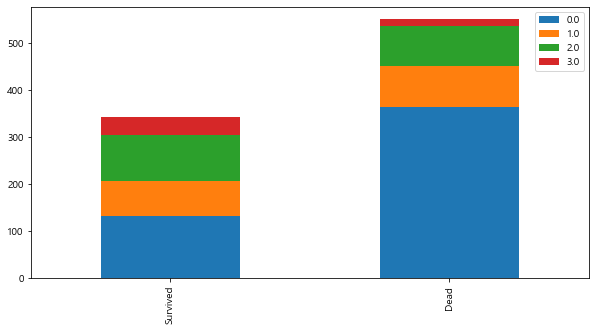

In [36]:
bar_chart('Fare')

### Cabin

In [37]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
D              3
E101           3
              ..
F38            1
D48            1
D56            1
D9             1
C106           1
Name: Cabin, Length: 147, dtype: int64

In [38]:
#알파벳으로 시작하고 숫자가 나오는 형태를 띠고 있다. 
#숫자는 핸들링 하기 어려워서 캐릭터만 가지고 해보자.

In [39]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [40]:
train.head()
train.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
886,887,0,2,0,2.0,0,0,211536,0.0,NaN,0,Rev
887,888,1,1,1,1.0,0,0,112053,1.0,B,0,Miss
888,889,0,3,1,1.0,1,2,W./C. 6607,1.0,NaN,0,Miss
889,890,1,1,0,2.0,0,0,111369,1.0,C,1,Mr
890,891,0,3,0,2.0,0,0,370376,0.0,NaN,2,Mr


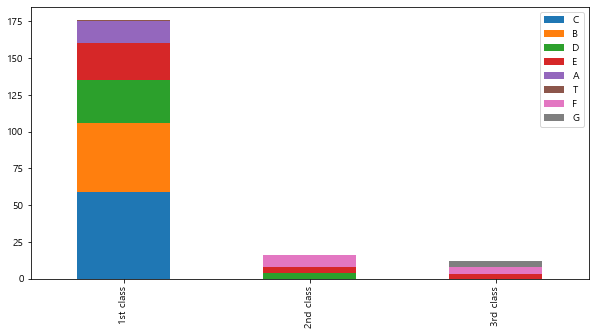

In [41]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [42]:
cabin_mapping = {'A':0, 'B':0.4, 'C':0.8, 'D':1.2, 'E':1.6, 'F':2, 'G':2.4, 'T': 2.8}

In [43]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [44]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

In [45]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,Mr
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,Mrs
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,2.0,0,Miss
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,Mrs
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,Mr


### FamilySize : 동승자 컬럼 합치기

In [46]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [48]:
train['FamilySize'].value_counts()
test['FamilySize'].value_counts()

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: FamilySize, dtype: int64

In [49]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [52]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,Mr,1
1,893,3,1,3.0,0.0,2.0,0,Mrs,2
2,894,2,0,4.0,0.0,2.0,2,Mr,1
3,895,3,0,2.0,0.0,2.0,0,Mr,1
4,896,3,1,1.0,0.0,2.0,0,Mrs,3


In [54]:
train_data = train.drop("Survived",axis=1)
target = train["Survived"]

In [55]:
print(train_data.shape,target.shape)

(891, 8) (891,)


## 지금까지의 전처리 파일로 저장

In [57]:
train_data.to_csv('data/titanic/train_data.csv',index=False)
target.to_csv('data/titanic/target.csv',index=False)